In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

# Analisi esplorativa dei dati di training

#### train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.


  - PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
  - HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
  - CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
  - Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
  - Destination - The planet the passenger will be debarking to.
  - Age - The age of the passenger.
  - VIP - Whether the passenger has paid for special VIP service during the voyage.
  - RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
  - Name - The first and last names of the passenger.
  - Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


#### test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data.

Your task is to predict the value of Transported for the passengers in this set.


In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


#Rimuoviamo i valori doppi nella colonna Names, ipotizzando non ci siano omonimi
print(train['Name'].duplicated().sum())
train.drop_duplicates('Name', keep='last')

In [5]:
#Sostituiamo i valori nulli con le medie di colonna
train['Age'] = train['Age'].fillna(np.mean(train['Age']))
train['RoomService'] = train['RoomService'].fillna(np.mean(train['RoomService']))
train['FoodCourt'] = train['FoodCourt'].fillna(np.mean(train['FoodCourt']))
train['ShoppingMall'] = train['ShoppingMall'].fillna(np.mean(train['ShoppingMall']))
train['Spa'] = train['Spa'].fillna(np.mean(train['Spa']))
train['VRDeck'] = train['VRDeck'].fillna(np.mean(train['VRDeck']))

#Rimuoviamo le righe con valori nulli in variabili qualitative in quanto non sostituibili con altri valori senza distorsioni del dataframe 

train = train.dropna() 

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7559 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7559 non-null   object 
 1   HomePlanet    7559 non-null   object 
 2   CryoSleep     7559 non-null   object 
 3   Cabin         7559 non-null   object 
 4   Destination   7559 non-null   object 
 5   Age           7559 non-null   float64
 6   VIP           7559 non-null   object 
 7   RoomService   7559 non-null   float64
 8   FoodCourt     7559 non-null   float64
 9   ShoppingMall  7559 non-null   float64
 10  Spa           7559 non-null   float64
 11  VRDeck        7559 non-null   float64
 12  Name          7559 non-null   object 
 13  Transported   7559 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 834.1+ KB


In [6]:
train['Age'] = pd.to_numeric(train['Age'], errors ='coerce')
train['RoomService'] = pd.to_numeric(train['RoomService'], errors ='coerce')
train['FoodCourt'] = pd.to_numeric(train['FoodCourt'], errors ='coerce')
train['ShoppingMall'] = pd.to_numeric(train['ShoppingMall'], errors ='coerce')
train['Spa'] = pd.to_numeric(train['Spa'], errors ='coerce')
train['VRDeck'] = pd.to_numeric(train['VRDeck'], errors ='coerce')
train['CryoSleep'] = train['CryoSleep'].astype(bool).astype(int) 
train['VIP'] = train['VIP'].astype(bool).astype(int) 
train['Transported'] = train['Transported'].astype(bool).astype(int) 
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7559 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7559 non-null   object 
 1   HomePlanet    7559 non-null   object 
 2   CryoSleep     7559 non-null   int64  
 3   Cabin         7559 non-null   object 
 4   Destination   7559 non-null   object 
 5   Age           7559 non-null   float64
 6   VIP           7559 non-null   int64  
 7   RoomService   7559 non-null   float64
 8   FoodCourt     7559 non-null   float64
 9   ShoppingMall  7559 non-null   float64
 10  Spa           7559 non-null   float64
 11  VRDeck        7559 non-null   float64
 12  Name          7559 non-null   object 
 13  Transported   7559 non-null   int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 885.8+ KB


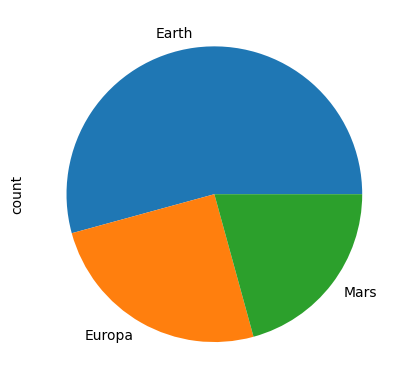

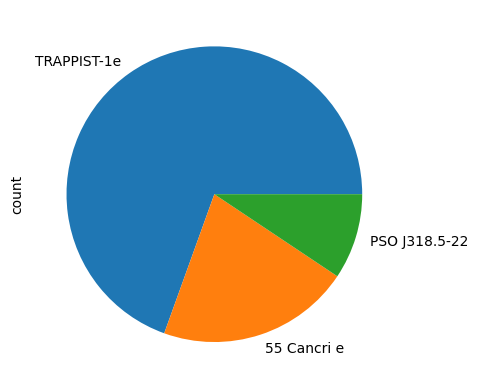

In [7]:
#Procediamo con la visualizzazione dei dati

train['HomePlanet'].value_counts().plot.pie()
plt.show()
train['Destination'].value_counts().plot.pie()
plt.show()


La maggior parte dei passeggeri proviene dalla Terra ed è diretta a TRAPPIST-1e

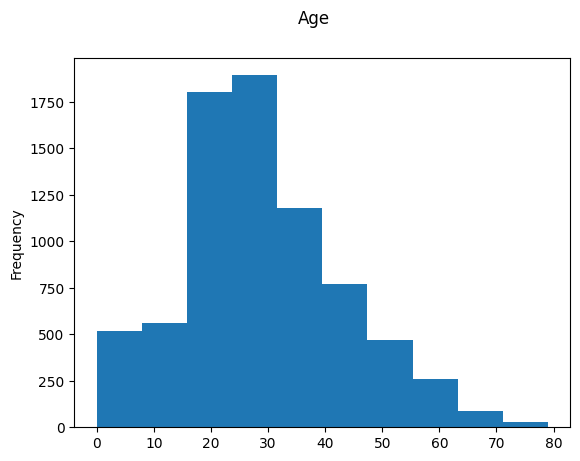

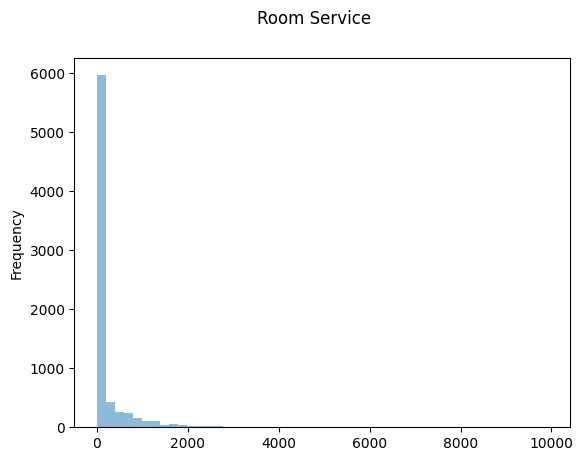

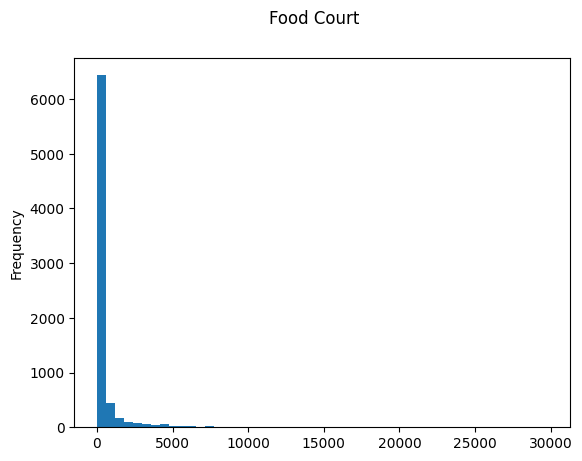

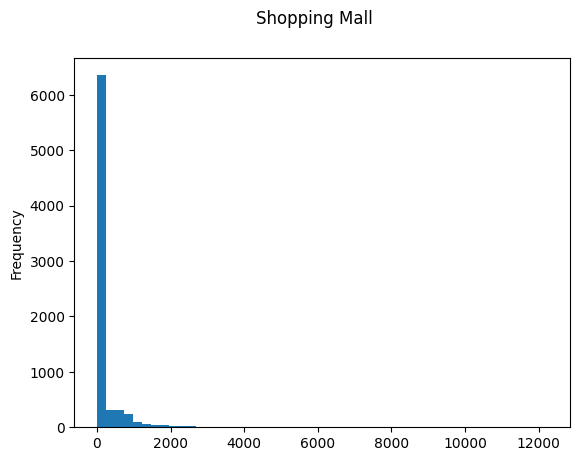

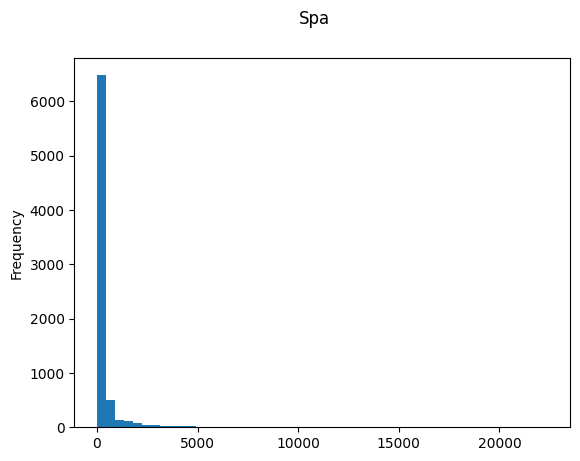

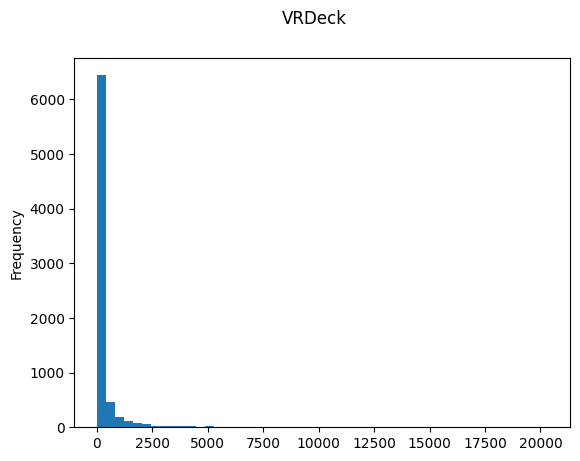

In [8]:
train['Age'].plot.hist()
plt.suptitle("Age")
plt.show()
train['RoomService'].plot.hist(alpha = .5,bins=50)
plt.suptitle("Room Service")
plt.show()
train['FoodCourt'].plot.hist(bins=50)
plt.suptitle("Food Court")
plt.show()
train['ShoppingMall'].plot.hist(bins=50)
plt.suptitle("Shopping Mall")
plt.show()
train['Spa'].plot.hist(bins=50)
plt.suptitle("Spa")
plt.show()
train['VRDeck'].plot.hist(bins=50)
plt.suptitle("VRDeck")
plt.show()


Dal primo istogramma osserviamo che l'età mediana è 20, dai successivi invece notiamo che la maggior parte de passeggeri ha speso meno di 5000$ sulla nave

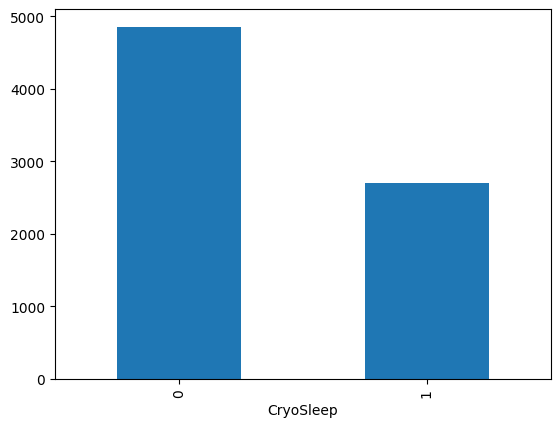

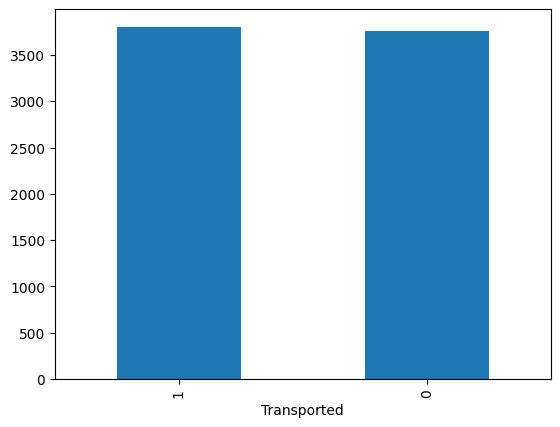

In [9]:
train['CryoSleep'].value_counts().plot.bar()
plt.show()
train['Transported'].value_counts().plot.bar()
plt.show()

La maggior parte dei passeggeri non era nel Cryo Sleep quando è avvenuto l'incidente.
Inoltre la quantità di passeggeri trasportati è quasi pari alla metà

## Data Engeenering

In [10]:
train['ExpAmount'] = train['RoomService']+train['FoodCourt']+train['ShoppingMall']+train['Spa']+train['VRDeck']
train = train.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'],axis=1)
train = train.drop(['Name'],axis=1)

train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7559 entries, 0 to 8692
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  7559 non-null   object 
 1   HomePlanet   7559 non-null   object 
 2   CryoSleep    7559 non-null   int64  
 3   Cabin        7559 non-null   object 
 4   Destination  7559 non-null   object 
 5   Age          7559 non-null   float64
 6   VIP          7559 non-null   int64  
 7   Transported  7559 non-null   int64  
 8   ExpAmount    7559 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 590.5+ KB


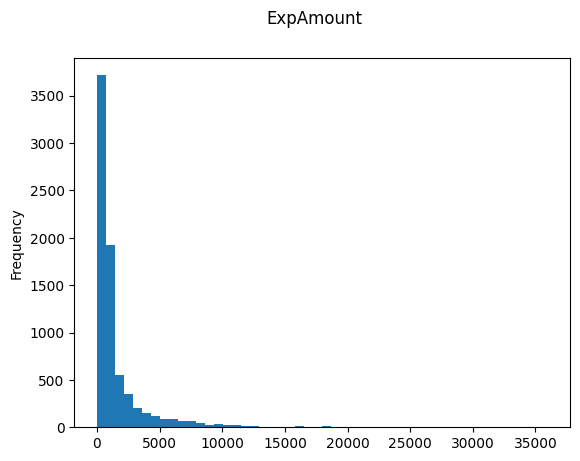

In [11]:
train['ExpAmount'].plot.hist(bins=50)
plt.suptitle("ExpAmount")
plt.show()


In [12]:
train[['deck', 'num', 'side']] = train['Cabin'].str.split('/', expand=True)
train = train.drop(['Cabin'],axis=1)
train.head()


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,ExpAmount,deck,num,side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0,0,0.0,B,0,P
1,0002_01,Earth,0,TRAPPIST-1e,24.0,0,1,736.0,F,0,S
2,0003_01,Europa,0,TRAPPIST-1e,58.0,1,0,10383.0,A,0,S
3,0003_02,Europa,0,TRAPPIST-1e,33.0,0,0,5176.0,A,0,S
4,0004_01,Earth,0,TRAPPIST-1e,16.0,0,1,1091.0,F,1,S


In [13]:
train[['id', 'group']] = train['PassengerId'].str.split('_', expand=True)
train = train.drop(['PassengerId','id'],axis=1)
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,ExpAmount,deck,num,side,group
0,Europa,0,TRAPPIST-1e,39.0,0,0,0.0,B,0,P,01
1,Earth,0,TRAPPIST-1e,24.0,0,1,736.0,F,0,S,01
2,Europa,0,TRAPPIST-1e,58.0,1,0,10383.0,A,0,S,01
3,Europa,0,TRAPPIST-1e,33.0,0,0,5176.0,A,0,S,02
4,Earth,0,TRAPPIST-1e,16.0,0,1,1091.0,F,1,S,01


In [14]:
train = pd.get_dummies(train, columns=['side'], drop_first=False)
train = train.drop(['num','deck'],axis=1)
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,ExpAmount,group,side_P,side_S
0,Europa,0,TRAPPIST-1e,39.0,0,0,0.0,01,True,False
1,Earth,0,TRAPPIST-1e,24.0,0,1,736.0,01,False,True
2,Europa,0,TRAPPIST-1e,58.0,1,0,10383.0,01,False,True
3,Europa,0,TRAPPIST-1e,33.0,0,0,5176.0,02,False,True
4,Earth,0,TRAPPIST-1e,16.0,0,1,1091.0,01,False,True


In [15]:
train['ExpAmount'] = (train['ExpAmount'] - train['ExpAmount'].mean()) / train['ExpAmount'].std()
train = train.drop(['HomePlanet','Destination','group'],axis=1)

### Machine learning

<class 'pandas.core.frame.DataFrame'>
Index: 7559 entries, 0 to 8692
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CryoSleep    7559 non-null   int64  
 1   Age          7559 non-null   float64
 2   VIP          7559 non-null   int64  
 3   Transported  7559 non-null   int64  
 4   ExpAmount    7559 non-null   float64
 5   side_P       7559 non-null   bool   
 6   side_S       7559 non-null   bool   
dtypes: bool(2), float64(2), int64(3)
memory usage: 369.1 KB


<Axes: >

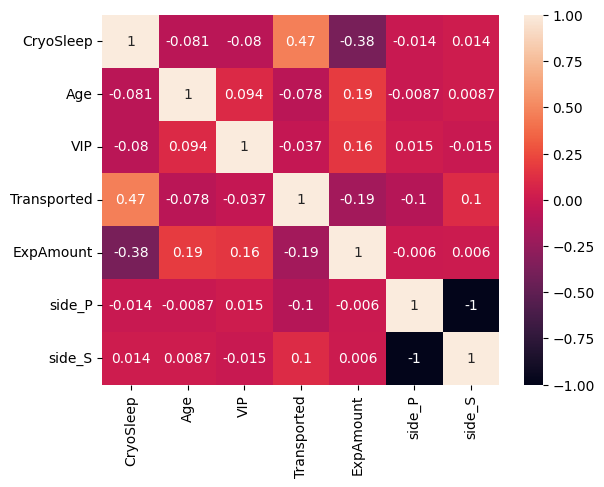

In [16]:
train.info()
sns.heatmap(train.corr(method='pearson',numeric_only=True), annot=True)

Proviamo a utilizzare l'algoritmo di Random Forest per determinare la colonna "Transported"

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [18]:
X = train.drop('Transported',axis=1)
y = train['Transported']

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#Prepariamo il dataset di test
test['Age'] = test['Age'].fillna(np.mean(test['Age']))
test['RoomService'] = test['RoomService'].fillna(np.mean(test['RoomService']))
test['FoodCourt'] = test['FoodCourt'].fillna(np.mean(test['FoodCourt']))
test['ShoppingMall'] = test['ShoppingMall'].fillna(np.mean(test['ShoppingMall']))
test['Spa'] = test['Spa'].fillna(np.mean(test['Spa']))
test['VRDeck'] = test['VRDeck'].fillna(np.mean(test['VRDeck']))
test = test.dropna() 
test['Age'] = pd.to_numeric(test['Age'], errors ='coerce')
test['RoomService'] = pd.to_numeric(test['RoomService'], errors ='coerce')
test['FoodCourt'] = pd.to_numeric(test['FoodCourt'], errors ='coerce')
test['ShoppingMall'] = pd.to_numeric(test['ShoppingMall'], errors ='coerce')
test['Spa'] = pd.to_numeric(test['Spa'], errors ='coerce')
test['VRDeck'] = pd.to_numeric(test['VRDeck'], errors ='coerce')
test['CryoSleep'] = test['CryoSleep'].astype(bool).astype(int) 
test['VIP'] = test['VIP'].astype(bool).astype(int) 
test['ExpAmount'] = test['RoomService']+test['FoodCourt']+test['ShoppingMall']+test['Spa']+test['VRDeck']
test = test.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'],axis=1)
test = test.drop(['Name'],axis=1)
test[['deck', 'num', 'side']] = test['Cabin'].str.split('/', expand=True)
test = test.drop(['Cabin'],axis=1)
test = pd.get_dummies(test, columns=['side'], drop_first=False)
test = test.drop(['num','deck'],axis=1)
test['ExpAmount'] = (test['ExpAmount'] - test['ExpAmount'].mean()) / test['ExpAmount'].std()
test = test.drop(['HomePlanet','Destination','PassengerId'],axis=1)

In [21]:
test.head()

,CryoSleep,Age,VIP,ExpAmount,side_P,side_S
0,1,27.0,0,-0.521992,False,True
1,0,19.0,0,0.504718,False,True
2,1,31.0,0,-0.521992,False,True
3,0,38.0,0,2.167321,False,True
4,0,20.0,0,-0.288155,False,True


In [22]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(xtrain,ytrain)

RandomForestClassifier(random_state=42)

In [23]:
ypred = model.predict(xtest)
print("Accuracy:", accuracy_score(ytest, ypred))
print("\nReport:\n", classification_report(ytest, ypred))

Accuracy: 0.6990740740740741

Report:
               precision    recall  f1-score   support

           0       0.71      0.68      0.70       762
           1       0.69      0.72      0.70       750

    accuracy                           0.70      1512
   macro avg       0.70      0.70      0.70      1512
weighted avg       0.70      0.70      0.70      1512



In [24]:
importances = model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

CryoSleep: 0.1571
Age: 0.2317
VIP: 0.0028
ExpAmount: 0.5950
side_P: 0.0070
side_S: 0.0065


In [25]:
from sklearn.model_selection import GridSearchCV

parametri = {
    'n_estimators': [100, 150, 350],
    'max_depth': [4, 10, 25],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), parametri, cv=5, scoring='precision', n_jobs=-1)
grid.fit(xtrain, ytrain)

print("Migliori parametri:", grid.best_params_)
print("Accuracy migliore:", grid.best_score_)


Migliori parametri: {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100}
Accuracy migliore: 0.7950485233784369


In [26]:
parametri = {
    'n_estimators': [75, 100, 125],
    'max_depth': [None, 2, 4, 7],
    'min_samples_split': [7, 10, 13],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), parametri, cv=5, scoring='precision', n_jobs=-1)
grid.fit(xtrain, ytrain)

print("Migliori parametri:", grid.best_params_)
print("Precisione migliore:", grid.best_score_)


Migliori parametri: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 13, 'n_estimators': 125}
Precisione migliore: 0.7964739981227421


In [27]:
parametri = {
    'n_estimators': [115, 125, 135],
    'max_depth': [4, 7, 9],
    'min_samples_split': [10, 13, 16],
    'max_features': ['sqrt']
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), parametri, cv=5, scoring='precision', n_jobs=-1)
grid.fit(xtrain, ytrain)

print("Migliori parametri:", grid.best_params_)
print("Precisione migliore:", grid.best_score_)


Migliori parametri: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 16, 'n_estimators': 135}
Precisione migliore: 0.7968536042506356


In [28]:
bestmodel = grid.best_estimator_
ybestpred = bestmodel.predict(xtest)
print("Accuracy:", accuracy_score(ytest, ypred))
print("\nReport:\n", classification_report(ytest, ypred))

Accuracy: 0.6990740740740741

Report:
               precision    recall  f1-score   support

           0       0.71      0.68      0.70       762
           1       0.69      0.72      0.70       750

    accuracy                           0.70      1512
   macro avg       0.70      0.70      0.70      1512
weighted avg       0.70      0.70      0.70      1512



In [29]:
Y = bestmodel.predict(test)
testnew = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
Id = testnew['PassengerId']
submit = pd.DataFrame(Id)

In [30]:
submit['Transported'] = Y
submit['Transported'] = submit['Transported'].astype(bool)
submit.head()

ValueError: Length of values (3747) does not match length of index (4277)

In [ ]:
submit.to_csv('submission.csv', index=True)